<a href="https://colab.research.google.com/github/saumikghosh/quantium_dataanalytics/blob/main/quantium_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving QVI_transaction_data.xlsx to QVI_transaction_data (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transactiondata=pd.read_csv("C:\Users\Soumik Ghosh\Desktop\internship\QVI_transaction_data.xlsx")
transactiondata.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-8e81fcedba09>, line 1)

In [5]:
import io
data = io.BytesIO(uploaded['QVI_transaction_data (1).xlsx'])
df = pd.read_excel(data)
df.head() #reading the file having a glance

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
missing_values=pd.isnull(df[["PROD_QTY","TOT_SALES"]])
print(missing_values) #shows no missing values as such

        PROD_QTY  TOT_SALES
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
264831     False      False
264832     False      False
264833     False      False
264834     False      False
264835     False      False

[264836 rows x 2 columns]


In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df["PROD_QTY"]))
print(z)

0         0.144008
1         1.697641
2         0.144008
3         4.804906
4         1.697641
            ...   
264831    0.144008
264832    1.409624
264833    0.144008
264834    0.144008
264835    0.144008
Name: PROD_QTY, Length: 264836, dtype: float64


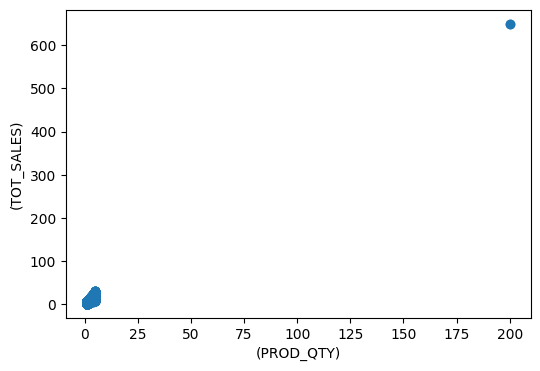

In [20]:

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(df["PROD_QTY"],df["TOT_SALES"])
ax.set_xlabel('(PROD_QTY)')
ax.set_ylabel('(TOT_SALES)')
plt.show()                                       #we can see that 200 is the outlier



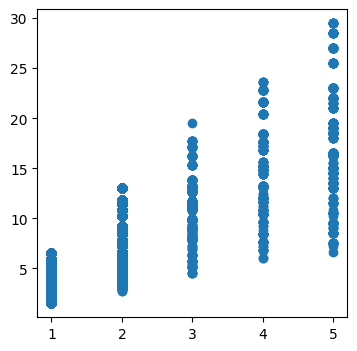

In [27]:
outlier_indices = np.where((df["TOT_SALES"]>50)&(df["PROD_QTY"]>50))
no_outliers=df.drop(outlier_indices[0])
fig,ax_no_outliers = plt.subplots(figsize=(4,4))
ax_no_outliers.scatter(no_outliers["PROD_QTY"],no_outliers["TOT_SALES"])   #removed the outliers


